In [1]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np

# Monkey-patch: if np.NaN is missing, set it to np.nan
if not hasattr(np, 'NaN'):
    np.NaN = np.nan

version_url = "https://api.beta.ons.gov.uk/v1/datasets/retail-sales-index/editions/time-series/versions/32"
response = requests.get(version_url)
response.raise_for_status()  # Raises an exception for HTTP errors
data = response.json()


# Extract the CSV download URL.
csv_url = data["downloads"]["csv"]["href"]

# Download the CSV data.
csv_response = requests.get(csv_url)
csv_response.raise_for_status()



c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv(StringIO(csv_response.text))

In [3]:
df_mom= df[
    (df['type-of-prices']=="chained-volume-percentage-change-on-previous-month") & 
    (df['sic-unofficial']=="all-retailing-including-automotive-fuel")
    ].sort_values('mmm-yy')

df_mom['ds'] = pd.to_datetime('01-' + df_mom['mmm-yy'], format='%d-%b-%y')

<Axes: xlabel='ds', ylabel='y'>

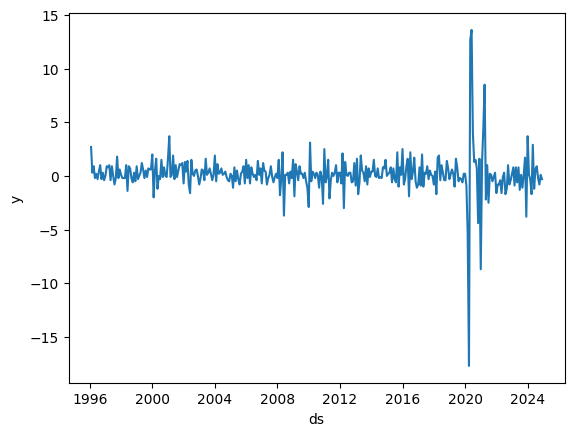

In [4]:
df_agg = df_mom[['ds','v4_1']].copy()
df_agg.columns = ['ds', 'y']


sns.lineplot(data=df_agg, x="ds",y="y")


In [5]:
df_input = df_agg.sort_values('ds').dropna().reset_index(drop=True)

In [209]:
def drop_last_n_months(df, n):
    if n <= 0:
        return df.copy()  # no changes if n is 0 or negative
    return df.iloc[:-n].copy()

trunc_input = drop_last_n_months(df_input, 8)

In [6]:
trunc_input.tail(10)

NameError: name 'trunc_input' is not defined

In [ ]:
m = NeuralProphet()

metrics = m.fit(trunc_input , freq='MS')

future = m.make_future_dataframe(trunc_input , periods=12)

forecast = m.predict(future)

fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)

merged_df = pd.merge(forecast[['ds', 'yhat1']], trunc_input , on='ds', how='outer')
merged_df['combined'] = merged_df['y'].fillna(merged_df['yhat1'])
merged_df['is_forecast'] = merged_df.y.isna()

merged_df
sns.lineplot(data = merged_df, x='ds',y='combined', hue='is_forecast')

merged_df.tail(13)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.705]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (22) is too small than the required number                     for the learning rate finder (216). The results might not be optimal.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Finding best initial lr: 100%|██████████| 216/216 [00:00<00:00, 254.64it/s]


Training: |          | 0/? [00:14<?, ?it/s, v_num=16, train_loss=0.0112, reg_loss=0.000, MAE=0.956, RMSE=1.520, Loss=0.0109, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.705]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_util

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 330.83it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `n

WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




,ds,yhat1,y,combined,is_forecast
338,2024-04-01,NaN,-1.7,-1.700000,False
339,2024-05-01,-0.242446,NaN,-0.242446,True
340,2024-06-01,0.174527,NaN,0.174527,True
341,2024-07-01,-0.184264,NaN,-0.184264,True
342,2024-08-01,-0.278197,NaN,-0.278197,True
343,2024-09-01,-0.425956,NaN,-0.425956,True
344,2024-10-01,-0.131501,NaN,-0.131501,True
345,2024-11-01,-0.553831,NaN,-0.553831,True
346,2024-12-01,-0.489590,NaN,-0.489590,True
347,2025-01-01,-0.532748,NaN,-0.532748,True


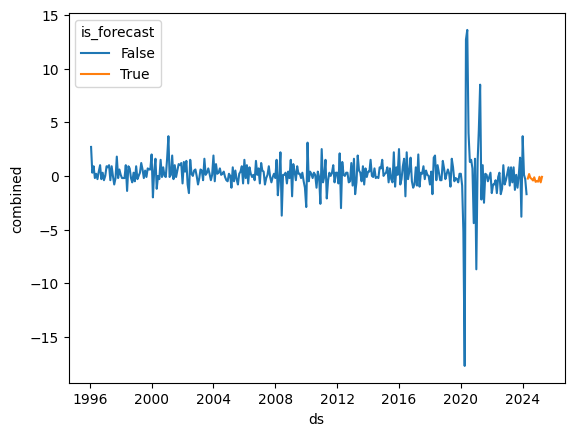

In [ ]:
merged_df[merged_df.is_forecast].head(1)

,ds,yhat1,y,combined,is_forecast
346,2024-11-30,-0.437389,NaN,-0.437389,True


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Ensure that the date column is datetime and data is sorted
trunc_input['ds'] = pd.to_datetime(trunc_input['ds'])
trunc_input = trunc_input.sort_values('ds').reset_index(drop=True)

# Scale the target values to help the network learn
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler.fit_transform(trunc_input[['y']])

# Function to create sequences for LSTM training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 12  # using past 12 periods to predict the next period
X, y = create_sequences(scaled_y, sequence_length)
# Reshape X to be [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build a simple LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=16, verbose=1)

# Forecasting: use the last available sequence to predict 12 future steps iteratively
last_sequence = scaled_y[-sequence_length:]  # last sequence from the training data
forecast_scaled = []
current_sequence = last_sequence.copy()

for _ in range(12):
    # Reshape current sequence for prediction: (1, sequence_length, 1)
    current_sequence_reshaped = np.reshape(current_sequence, (1, sequence_length, 1))
    # Predict next value
    pred = model.predict(current_sequence_reshaped)
    forecast_scaled.append(pred[0, 0])
    # Update the sequence: drop the first value and append the new prediction
    current_sequence = np.append(current_sequence[1:], [[pred[0, 0]]], axis=0)

# Inverse transform the scaled forecast values back to the original scale
forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1))

# Create a date range for the forecast period (assuming monthly frequency)
last_date = trunc_input['ds'].iloc[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'ds': forecast_dates,
    'yhat': forecast.flatten()
})

# Merge forecast with original data for plotting
merged_df = pd.merge(trunc_input, forecast_df, on='ds', how='outer')
merged_df['combined'] = merged_df['y'].fillna(merged_df['yhat'])
merged_df['is_forecast'] = merged_df['y'].isna()

# Plot the results
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x='ds', y='combined', hue='is_forecast', palette=['blue', 'red'])
plt.title("LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# Optionally, print the tail to inspect the forecasted values
print(merged_df.tail(13))


ModuleNotFoundError: No module named 'tensorflow'